<a href="https://colab.research.google.com/github/tbradshaw91/Predictive-Modeling-Sprint_Challenge/blob/master/Predictive_Modeling_Sprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Which Water Pumps Are Faulty**

## **Imports**

In [2]:
!pip install category_encoders

In [0]:
%matplotlib inline
import warnings
import category_encoders as ce
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.exceptions import DataConversionWarning
# data Process
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
# model setup
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier
from xgboost import XGBClassifier
# metric
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, accuracy_score, recall_score, roc_auc_score, confusion_matrix
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=RuntimeWarning)
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

In [0]:
test_features = pd.read_csv('https://raw.githubusercontent.com/tbradshaw91/Predictive-Modeling-Sprint_Challenge/master/test_features.csv')
train_features = pd.read_csv('https://raw.githubusercontent.com/tbradshaw91/Predictive-Modeling-Sprint_Challenge/master/train_features.csv')
train_labels = pd.read_csv('https://raw.githubusercontent.com/tbradshaw91/Predictive-Modeling-Sprint_Challenge/master/train_labels.csv')

## **Looking at the data**

In [5]:
train_features.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [6]:
train_features.shape, test_features.shape, train_labels.shape

((59400, 40), (14358, 40), (59400, 2))

In [7]:
train_labels.describe(include='object')

,status_group
count,59400
unique,3
top,functional
freq,32259


In [8]:
train_labels['status_group'].value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

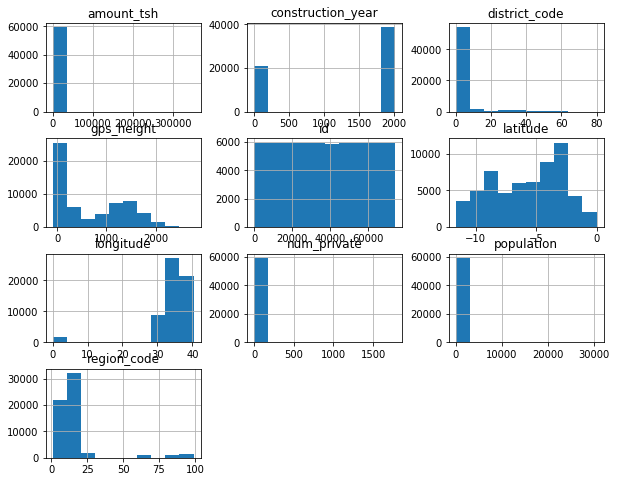

In [9]:
train_features.hist(figsize=(10,8))
plt.show();

In [0]:
# Next step is to merge
merged = pd.DataFrame.merge(train_labels, train_features)

In [12]:
# Do I have nulls?
merged.isnull().sum()

id                           0
status_group                 0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_qu

In [0]:
# Dropping the nulls 
training = merged.dropna(axis = 1)

In [14]:
# Checking that dropna worked
training.isnull().sum().sum()

0

In [0]:
# Splitting training and testing
# While predicting status
X = training.drop(columns=['status_group'], axis=1)
y = training['status_group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=42)

In [0]:
# Creating a dummy encoder
def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df

In [18]:
# Assigning the encoded cats and obj to a var
X_train_encoded = dummyEncode(X_train)
X_test_encoded = dummyEncode(X_test)
X_new = dummyEncode(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
X_train_encoded.head()

,id,amount_tsh,date_recorded,gps_height,longitude,latitude,wpt_name,num_private,basin,region,region_code,district_code,lga,ward,population,recorded_by,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
142,64130,0.0,189,0,32.785025,-5.418031,11670,0,3,19,14,5,107,310,0,0,0,4,2,1,7,4,0,2,6,2,0,0,7,5,0,4,3
1056,5968,0.0,85,1804,34.767711,-9.089774,5137,0,6,3,11,4,91,1155,65,0,2009,3,1,0,7,4,5,3,6,2,1,1,8,6,0,1,1
54991,53989,0.0,174,0,34.531640,-3.727918,16370,0,0,17,17,6,64,1462,0,0,0,8,5,1,11,4,0,2,6,2,1,1,7,5,0,4,3
23651,3849,0.0,229,0,32.800493,-5.018881,8820,0,3,19,14,6,115,159,0,0,0,9,6,3,1,1,4,5,6,2,1,1,0,1,1,2,1
36341,67824,0.0,266,486,34.773950,-11.231885,9939,0,1,16,10,3,61,1115,60,0,2008,3,1,0,7,4,0,2,6,2,0,0,8,6,0,1,1


In [22]:
X_test_encoded.head()

,id,amount_tsh,date_recorded,gps_height,longitude,latitude,wpt_name,num_private,basin,region,region_code,district_code,lga,ward,population,recorded_by,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
2980,37098,0.0,178,0,31.985658,-3.596360,2884,0,3,17,17,5,9,441,0,0,0,9,6,3,11,4,6,6,6,2,0,0,7,5,0,6,5
5246,14530,0.0,203,0,32.832815,-4.944937,15148,0,3,19,14,6,114,2002,0,0,0,4,2,1,7,4,0,2,3,3,2,2,7,5,0,4,3
22659,62607,10.0,283,1675,35.488289,-4.242048,7459,0,0,8,21,1,2,209,148,0,2008,3,1,0,9,4,4,5,6,2,2,2,8,6,0,1,1
39888,46053,0.0,133,0,33.140828,-9.059386,2307,0,2,10,12,6,62,443,0,0,0,8,5,1,7,4,0,2,6,2,3,3,7,5,0,4,3
13361,47083,50.0,266,1109,34.217077,-4.430529,15543,0,0,18,13,1,23,1369,235,0,2011,7,4,2,10,4,4,5,6,2,1,1,3,0,0,2,1


## **Trying a Logistic Regression Model**

In [20]:
model= LogisticRegression()
model.fit(X_train_encoded, y_train)
y_pred = model.predict(X_test_encoded)
print('Logistic Regression Model Accuracy Score:', accuracy_score(y_test, y_pred))

Logistic Regression Model Accuracy Score: 0.6314478114478115


**Make a Pipeline**

In [24]:
pipeline = make_pipeline(ce.OneHotEncoder(use_cat_names=True),
                         StandardScaler(), LogisticRegression(solver ='lbfgs',n_jobs=-1, multi_class = 'auto',C=2))
pipeline.fit(X_train_encoded, y_train)

Pipeline(memory=None,
     steps=[('onehotencoder', OneHotEncoder(cols=[], drop_invariant=False, handle_missing='value',
       handle_unknown='value', return_df=True, use_cat_names=True,
       verbose=0)), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression...enalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False))])

In [0]:
y_pred = pipeline.predict(X_train)

In [0]:
prediction_1 = pd.DataFrame(y_pred, X_train_encoded['id'])

In [0]:
prediction_1.columns = ['status_group']

**Putting this in submission format**

In [0]:
submission_1 = pd.DataFrame(prediction_1)
sub_index = submission_1.index
submission = pd.DataFrame( submission_1['status_group'],sub_index)
submission.reset_index(inplace = True)